In [48]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
df_nat = pd.read_csv("mhc_nature.tsv", sep="\t")
df_nat["mhc"] = list(map(lambda x: "HLA" + x.replace("*", "").replace(":", ""), df_nat["mhc"]))
df_nat.head()

,mhc,pseudo
0,HLAA0101,MYFFAVGFVRFMYQERNMAHTDANTLYIQIYRDYIWITKWVAQRYRGY
1,HLAA0201,MYFFAVGFVRFMYGERKVAHTHVDTLYVQRYHYYIWTTKWAVQLYTWY
2,HLAA0202,MYFFAVGFVRFMYGERKVAHTHVDTLYLQRYHYYIWTTKWAVQWYTWY
3,HLAA0203,MYFFAVGFVRFMYGERKVAHTHVDTLYVQRYHYYIWTTKWAEQWYTWY
4,HLAA0204,MYFFAVGFVRFMYGERKVAHTHVDTLYVQMYHYYIWTTKWAVQLYTWY


In [6]:
df_our = pd.read_csv("mhc_seq_imghtla.csv")
df_our.head()

,Unnamed: 0,mhc,sequence,pseudo
0,0,HLAA0201,SHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,FTVEWETVKHSHRDLLRYNMGQADKEHARYLCLL
1,1,HLAA0211,SHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,FTVEWETVKHSDRDLLRYNMGQADKEHARYLCLL
2,2,HLAA2402,SHSMRYFSTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,FTVEWETVKHSDRNLALYNMGQADKEHARYLCLL
3,3,HLAA8001,SHSMRYFFTSVSRPGRGEPRFIAVGYVDDSQFVQFDSDAASQRMEP...,FTVEWETVKHSNRNLLRYNMGQADKERARYLCLL
4,4,HLAA3001,SHSMRYFSTSVSRPGSGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,FTVEWETVKQSDRDLLRYNMGQADQERARYLCLL


In [15]:
print(df_our.shape)
print(df_nat.shape)
len(set(df_our["mhc"]).intersection(set(df_nat["mhc"])))

(103, 4)
(135, 2)


95

In [17]:
set(df_our["mhc"]).difference(set(df_nat["mhc"]))

{'HLAA7401',
 'HLAB1401',
 'HLAB4202',
 'HLAC0303',
 'HLAC0501',
 'HLAC0802',
 'HLAC1203',
 'HLAC1502'}

In [18]:
set(df_nat["mhc"]).difference(set(df_our["mhc"]))

{'HLAA0208',
 'HLAA0209',
 'HLAA0214',
 'HLAA3003',
 'HLAA3004',
 'HLAA3303',
 'HLAA6602',
 'HLAA6603',
 'HLAB1301',
 'HLAB1403',
 'HLAB1508',
 'HLAB1510',
 'HLAB1512',
 'HLAB1516',
 'HLAB2707',
 'HLAB2709',
 'HLAB3502',
 'HLAB3909',
 'HLAB3910',
 'HLAB4101',
 'HLAB4102',
 'HLAB4103',
 'HLAB4104',
 'HLAB4105',
 'HLAB4405',
 'HLAB4408',
 'HLAB4427',
 'HLAB4701',
 'HLAB4901',
 'HLAB5001',
 'HLAB5102',
 'HLAB5103',
 'HLAB5501',
 'HLAB5502',
 'HLAB5601',
 'HLAC0102',
 'HLAC0304',
 'HLAC0701',
 'HLAC0801',
 'HLAC1601'}

In [27]:
df_thr = pd.read_table("bind_thr.txt")
df_thr["mhc"] = list(map(lambda x: "HLA" + x.replace("*", "").replace(":", ""), df_thr["Allele"]))
df_thr.drop("Allele", 1, inplace=True)
df_thr

,Freq,Thr,mhc
0,16.2,884,HLAA0101
1,25.2,255,HLAA0201
2,3.3,92,HLAA0203
3,4.9,60,HLAA0206
4,15.4,602,HLAA0301
5,12.9,382,HLAA1101
6,6.4,740,HLAA2301
7,16.8,849,HLAA2402
8,2.5,795,HLAA2501
9,4.7,815,HLAA2601


In [78]:
def hamm(seq1, seq2):
    res = 0
    for a,b in zip(seq1, seq2):
        res += a != b
    return res


dist = np.zeros((df_thr.shape[0], df_thr.shape[0]))
diff = np.zeros((df_thr.shape[0], df_thr.shape[0]))
for i in range(dist.shape[0]):
    for j in range(i, dist.shape[0]):
        seq1 = df_nat.ix[df_nat["mhc"] == df_thr["mhc"][i], "pseudo"].iloc[0]
        seq2 = df_nat.ix[df_nat["mhc"] == df_thr["mhc"][j], "pseudo"].iloc[0]
        dist[i,j] = hamm(seq1, seq2)
#         dist[j,i] = dist[i,j]
        diff[i,j] = df_thr["Thr"][i] / df_thr["Thr"][j]
#         diff[j,i] = diff[i,j]
        
diff

array([[ 1.        ,  3.46666667,  9.60869565, ...,  1.64312268,
         1.23463687,  1.98206278],
       [ 0.        ,  1.        ,  2.77173913, ...,  0.4739777 ,
         0.35614525,  0.57174888],
       [ 0.        ,  0.        ,  1.        , ...,  0.17100372,
         0.12849162,  0.20627803],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.75139665,  1.20627803],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  1.60538117],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

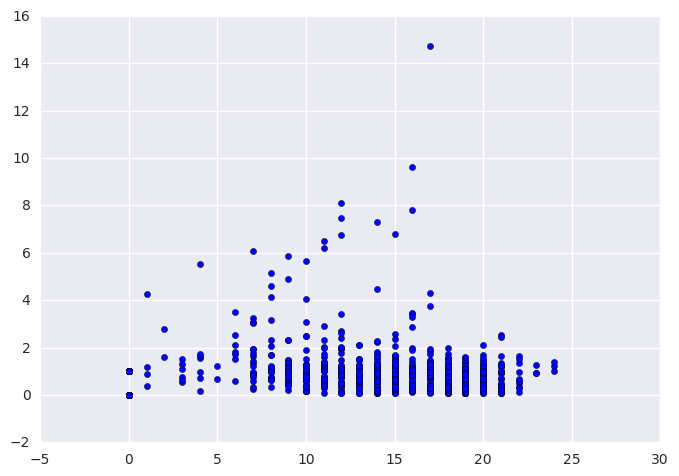

In [81]:
plt.scatter(dist, diff)